# ML Assignment 2: Machine learning with tree based models
# Nilesh Sonune | 16D070004

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [1]:
import pandas as pd 

In [2]:
train = pd.read_csv('titanic.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Importing Libraries

In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, accuracy_score
import xgboost as xgb
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

warnings.filterwarnings('ignore')

seed = 7

In [4]:
# size of the dataset
train.shape

(891, 12)

In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# get information about numerical data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# get information about categorical data
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hansen, Mr. Henry Damsgaard",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [9]:
# looking at datatypes
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002912A336D30>,
      dtype=object)

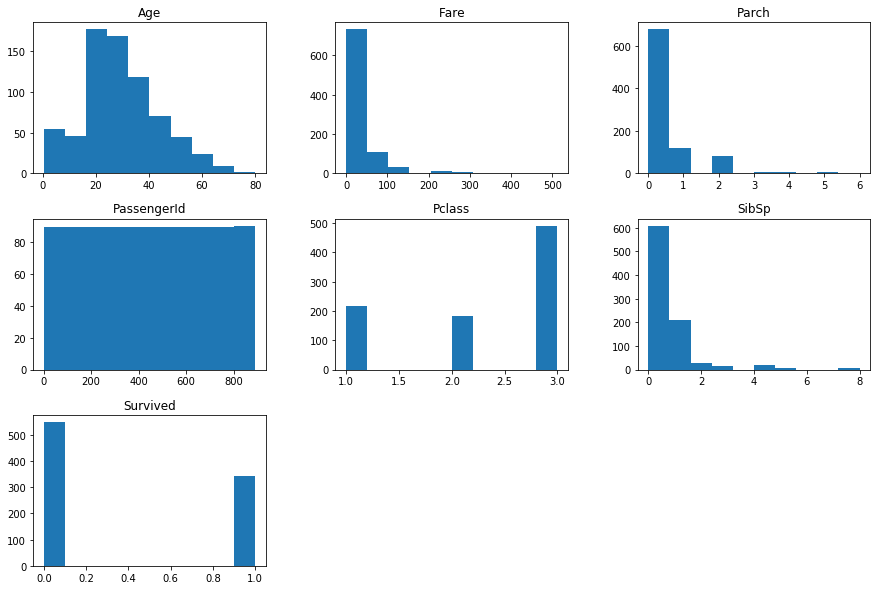

In [10]:
train.hist(figsize = (15,10), grid=False)

In [11]:
# from previous describe() step we know that only Sex and Embarked variables are plottable and relevant categorical features
# Pclass has numeric datatype but it resembles more like a categorical variable

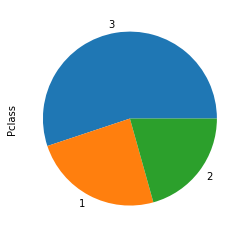

In [12]:
train['Pclass'].value_counts().plot(kind='pie')

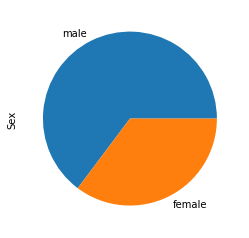

In [13]:
train['Sex'].value_counts().plot(kind='pie')

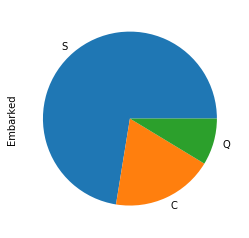

In [14]:
train['Embarked'].value_counts().plot(kind='pie')

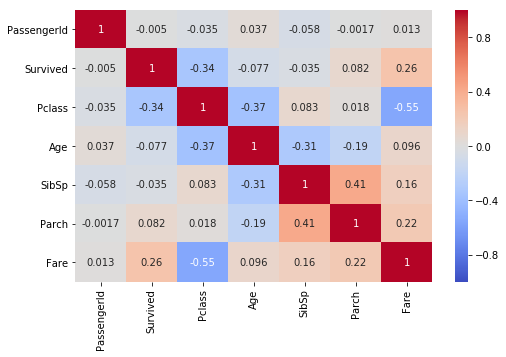

In [15]:
corr_values = train.corr()
plt.figure(figsize = (8,5))
sns.heatmap(corr_values, vmin = -1, cmap="coolwarm", annot=True)
plt.show()

# Data Preprocessing

In [16]:
num_cols = list(train.describe().columns)
cat_cols = list(train.describe(include=['O']).columns)
target = ['Survived']

print("numerical columns:", num_cols)
print("categorical columns:", cat_cols)

numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [17]:
num_cols.remove('Survived')
num_cols.remove('Pclass')
num_cols.remove('PassengerId')
num_cols.remove('SibSp')

cat_cols.remove('Name')
cat_cols.remove('Cabin')
cat_cols.remove('Ticket')
cat_cols.append('Pclass')


print("numerical columns after dropping:", num_cols)
print("categorical columns after dropping:", cat_cols)

numerical columns after dropping: ['Age', 'Parch', 'Fare']
categorical columns after dropping: ['Sex', 'Embarked', 'Pclass']


In [18]:
# Fill missing values
train.Age.fillna(train.Age.median(), inplace=True)
train.Embarked.fillna('S', inplace=True)

In [19]:
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [20]:
# Adding New Features
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1

In [21]:
# Mapping categorical variables
# Mapping Embarked
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

# Mapping Sex
train['Sex'] = train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Normalizing Numerical columns
std = StandardScaler()
scaled = std.fit_transform(train[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

train = train.drop(columns = num_cols, axis = 1)  
train = train.merge(scaled, left_index=True, right_index=True, how = "left")

# Drop useless/redundant features
train = train.drop(columns=['PassengerId', 'Cabin', 'Name', 'Ticket','SibSp'])

train.head()

,Survived,Pclass,Sex,Embarked,Has_Cabin,FamilySize,IsAlone,Age,Parch,Fare
0,0,3,1,0,0,2,0,-0.565736,-0.473674,-0.502445
1,1,1,0,1,1,2,0,0.663861,-0.473674,0.786845
2,1,3,0,0,0,1,1,-0.258337,-0.473674,-0.488854
3,1,1,0,0,1,2,0,0.433312,-0.473674,0.420730
4,0,3,1,0,0,1,1,0.433312,-0.473674,-0.486337


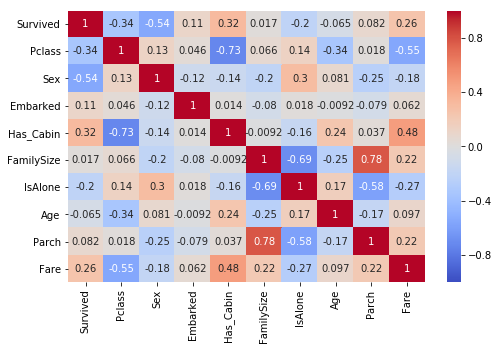

In [22]:
corr_values = train.corr()
plt.figure(figsize = (8,5))
sns.heatmap(corr_values, vmin = -1, cmap="coolwarm", annot=True)
plt.show()

In [23]:
# Separate the target variable
y = np.array(train[target[0]].tolist())
train = train.drop(target, axis = 1)
X = np.array(train.as_matrix())

# Train_test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = seed)

In [24]:
print(X_train.shape)
print(X_val.shape)

(712, 9)
(179, 9)


# Model Building & Performance Evaluation

In [25]:
# Creating a function to evaluate models
def model_eval(model, X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val):
    
    # fitting and predicting with model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    # Calculating Various metric scores
    print("Accuracy  : {0:.2f}".format(accuracy_score(y_val, y_pred)))
    print("Precision : {0:.2f}".format(precision_score(y_val, y_pred)))
    print("Recall    : {0:.2f}".format(recall_score(y_val, y_pred)))
    print("ROC_AUC   : {0:.2f}".format(roc_auc_score(y_val, y_pred)))
    
    print("-"*50)
    
    # Showing Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    print("Confusion Matrix:")
    sns.heatmap(cm, center=True, cmap="coolwarm", annot=True)
    plt.show()
    
    print("-"*50)
    
    # Plotting ROC curve
    model_probs = model.predict_proba(X_val)
    ns_probs = [0 for _ in range(len(y_val))]
    
    ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
    model_fpr, model_tpr, _ = roc_curve(y_val, model_probs[:,1])
    
    # plot the roc curve for the model
    plt.plot(model_fpr, model_tpr, marker='.', label='model')
    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')    
    plt.legend()
    plt.title("ROC Curve of the model")
    plt.show()

### XGB Classifier

Accuracy  : 0.80
Precision : 0.76
Recall    : 0.70
ROC_AUC   : 0.78
--------------------------------------------------
Confusion Matrix:


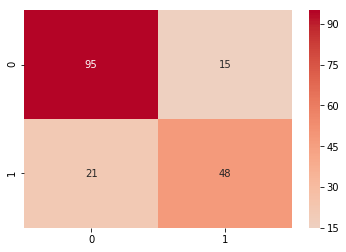

--------------------------------------------------


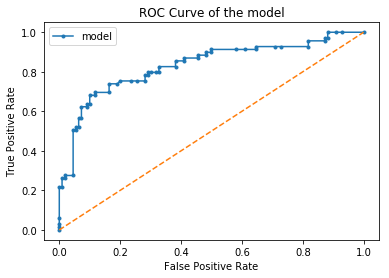

In [26]:
xgb_clf = xgb.XGBClassifier(n_estimators=500, n_jobs=-1, random_state=seed, verbosity=1)
model_eval(xgb_clf)

### Random Forest Classifier 

Accuracy  : 0.77
Precision : 0.72
Recall    : 0.67
ROC_AUC   : 0.75
--------------------------------------------------
Confusion Matrix:


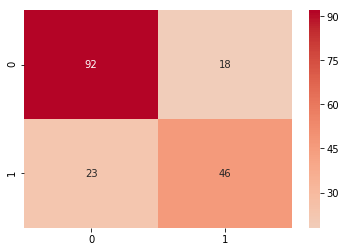

--------------------------------------------------


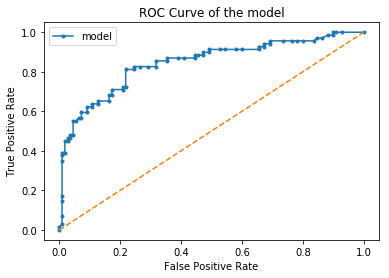

In [27]:
rf_clf = RandomForestClassifier(n_estimators= 700, n_jobs=-1, random_state=seed, verbose=0)
model_eval(rf_clf)

### Logistic Regression

Accuracy  : 0.75
Precision : 0.70
Recall    : 0.62
ROC_AUC   : 0.73
--------------------------------------------------
Confusion Matrix:


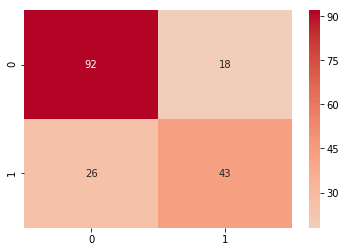

--------------------------------------------------


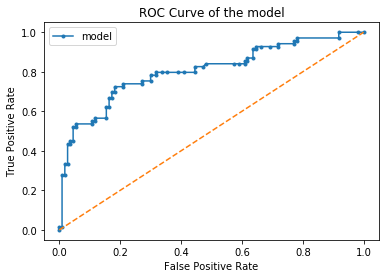

In [28]:
lr_clf = LogisticRegression(random_state = seed)
model_eval(lr_clf)

### SVM with RBF kernel

Accuracy  : 0.76
Precision : 0.73
Recall    : 0.59
ROC_AUC   : 0.73
--------------------------------------------------
Confusion Matrix:


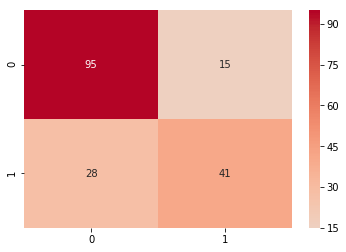

--------------------------------------------------


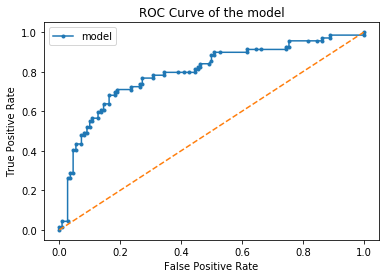

In [29]:
svc_clf = SVC(kernel='rbf', probability=True)
model_eval(svc_clf)

### Linear Discriminant Analysis (LDA) Classifier

Accuracy  : 0.75
Precision : 0.71
Recall    : 0.61
ROC_AUC   : 0.73
--------------------------------------------------
Confusion Matrix:


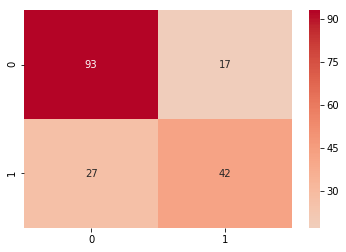

--------------------------------------------------


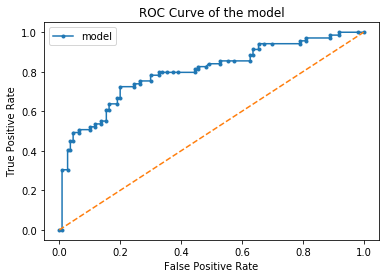

In [30]:
lda_clf = LinearDiscriminantAnalysis()
model_eval(lda_clf)

### Voting Classifier

Accuracy  : 0.80
Precision : 0.79
Recall    : 0.65
ROC_AUC   : 0.77
--------------------------------------------------
Confusion Matrix:


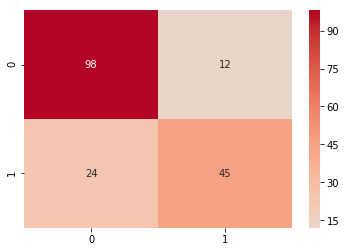

--------------------------------------------------


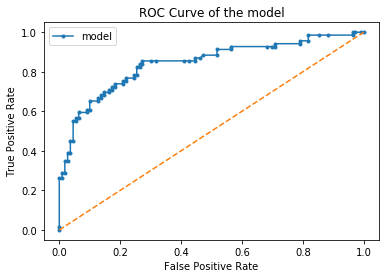

In [31]:
ensemble_clf = VotingClassifier(estimators=[('XGB', xgb_clf), ('RF', rf_clf), ('svc', svc_clf), 
                                            ('LR', lr_clf), ('LDA', lda_clf)],
                                            voting ='soft', weights=[2, 2, 1, 1, 1])
model_eval(ensemble_clf)